In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('../datasets/teen_phone_addiction_dataset.csv')

time_on_education = df['Time_on_Education'].values

print(type(time_on_education))  
print(time_on_education[:10])   


<class 'numpy.ndarray'>
[1.2 1.8 0.4 0.8 1.1 1.4 1.  0.5 1.3 1. ]


Среднее: 1.0163333333333333
Дисперсия: 0.42034667111259316
Мода: 0.0
Медиана: 1.0
Квантили (0.25, 0.5, 0.75): (np.float64(0.5), np.float64(1.0), np.float64(1.5))
Эксцесс: -0.39997284929065513
Асимметрия: 0.34002789690434665
Интерквартильный размах: 1.0


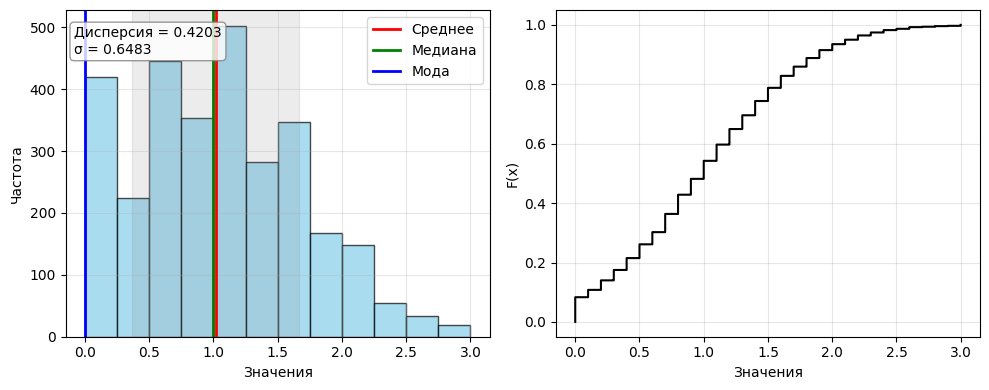

3000


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def analyze_and_plot_with_stats(data):
    data = np.asarray(data)

    mean_val = np.mean(data)
    var_val = np.var(data, ddof=1)            
    std_val  = np.sqrt(var_val)               
    mode_res = stats.mode(data, keepdims=True)
    mode_val = mode_res.mode[0]
    median_val = np.median(data)
    q25, q50, q75 = np.quantile(data, [0.25, 0.5, 0.75])
    excess_kurtosis = stats.kurtosis(data, fisher=True)
    skewness = stats.skew(data)
    iqr = stats.iqr(data)

    print("Среднее:", mean_val)
    print("Дисперсия:", var_val)
    print("Мода:", mode_val)
    print("Медиана:", median_val)
    print("Квантили (0.25, 0.5, 0.75):", (q25, q50, q75))
    print("Эксцесс:", excess_kurtosis)
    print("Асимметрия:", skewness)
    print("Интерквартильный размах:", iqr)


    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)

    n = len(data)
    bins = 1 + int(np.log2(n))

    plt.hist(data, bins=bins, edgecolor='black', alpha=0.7, color="skyblue")

    plt.axvline(mean_val,   linewidth=2, color='red',   label='Среднее')
    plt.axvline(median_val, linewidth=2, color='green', label='Медиана')
    plt.axvline(mode_val,   linewidth=2, color='blue',  label='Мода')

    plt.axvspan(mean_val - std_val, mean_val + std_val, alpha=0.15, color="gray")
    plt.text(0.02, 0.95, f"Дисперсия = {var_val:.4f}\nσ = {std_val:.4f}",
             transform=plt.gca().transAxes, va='top', ha='left',
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

    plt.xlabel("Значения")
    plt.ylabel("Частота")
    plt.legend()
    plt.grid(alpha=0.3)

    plt.subplot(1,2,2)
    sorted_vals = np.sort(data)
    y = np.arange(1, len(sorted_vals)+1) / len(sorted_vals)
    plt.step(sorted_vals, y, where="post", color="black")
    plt.xlabel("Значения")
    plt.ylabel("F(x)")
    plt.grid(alpha=0.3)

    plt.tight_layout()
    plt.show()

analyze_and_plot_with_stats(time_on_education)


Выводы: В среднем подростки тратят около 1 часа на образование. Наблюдается умеренный разброс значений. Основная масса значений сосредоточена между 0.5 и 1.5. Тк мода равна 0, то достаточно много студентов не тратят время на образование совсем. Однако у нас медиана и среднее почти равны друг другу, а следовательно возможно это какая-то особенность что много людей выбирают 0, а если это не учитывать то можно почти сказать что распределение симметричное.

Эксцесс = -0.40 показывает, что распределение более плоское по сравнению с нормальным, нет ярко выраженного пика.

Асимметрия = +0.34 означает слабую положительную асимметрия: есть небольшой правый хвост, то есть часть подростков тратит заметно больше среднего. Это видно и на гистограмме.

Быстрый рост ЭФР F(x) в интервале 0–1.5 показывает, что именно здесь сосредоточено основное большинство наблюдений. После 2 значения растут очень медленно — это хвост распределения.



Хи-квадрат
χ² статистика: 446.23249682312223
Критическое значение (α=0.05): 16.918977604620448
Гипотеза о нормальности:  отвергается

Асимметрия и эксцесс
Асимметрия = 0.3400, SE = 0.0447
Эксцесс    = -0.4000, SE = 0.0894
Гипотеза о нормальности: отвергается 

Q-Q Plot


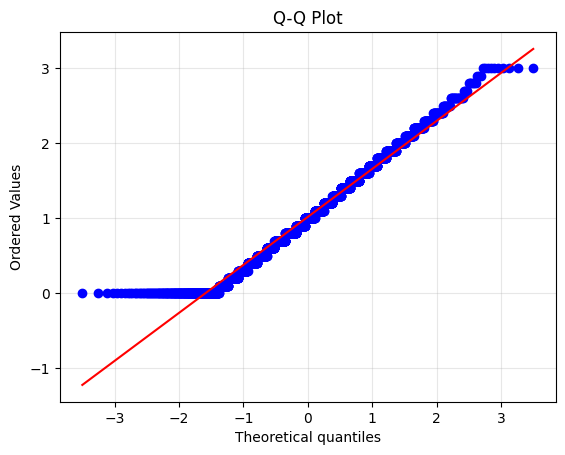

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def test_normality(data):

    n = len(data)
    mu, sigma = np.mean(data), np.std(data, ddof=1)

    # критерий согласия
    k = 1 + int(np.log2(n))
    observed, bin_edges = np.histogram(data, bins=k)

    cdf_vals = stats.norm.cdf(bin_edges, loc=mu, scale=sigma)
    expected_probs = np.diff(cdf_vals)
    expected = n * expected_probs

    chi2_stat = np.sum((observed - expected)**2 / expected)
    df_chi2 = k - 1 - 2  
    alpha = 0.05
    chi2_crit = stats.chi2.ppf(1 - alpha, df_chi2)

    print("Хи-квадрат")
    print("χ² статистика:", chi2_stat)
    print("Критическое значение (α=0.05):", chi2_crit)
    print("Гипотеза о нормальности:", " не отвергается" if chi2_stat < chi2_crit else " отвергается")

    # Критерий асимметрии и эксцесса
    skew_val = stats.skew(data)
    kurt_val = stats.kurtosis(data, fisher=True)

    se_skew = np.sqrt(6/n)
    se_kurt = np.sqrt(24/n)

    print("\nАсимметрия и эксцесс")
    print(f"Асимметрия = {skew_val:.4f}, SE = {se_skew:.4f}")
    print(f"Эксцесс    = {kurt_val:.4f}, SE = {se_kurt:.4f}")

    if abs(skew_val) < 2*se_skew and abs(kurt_val) < 2*se_kurt:
        print("Гипотеза о нормальности: не отвергается ")
    else:
        print("Гипотеза о нормальности: отвергается ")

    # Q-Q Plot
    print("\nQ-Q Plot")
    stats.probplot(data, dist="norm", plot=plt)
    plt.title("Q-Q Plot")
    plt.grid(alpha=0.3)
    plt.show()

test_normality(time_on_education)


Получаем, что и критерий согласия и критерий ассиметрии и эксцесс отвергают гипотизу о нормальном распределении выборки. 

По графику Q-Q plot видим что на начальном и конечном промежутках распраделение отклоняется от нормального. 

1: Усечение выбросов (1.5 * IQR)
Среднее: 1.0163333333333333
Дисперсия: 0.42034667111259316
Мода: 0.0
Медиана: 1.0
Квантили (0.25, 0.5, 0.75): (np.float64(0.5), np.float64(1.0), np.float64(1.5))
Эксцесс: -0.39997284929065513
Асимметрия: 0.34002789690434665
Интерквартильный размах: 1.0


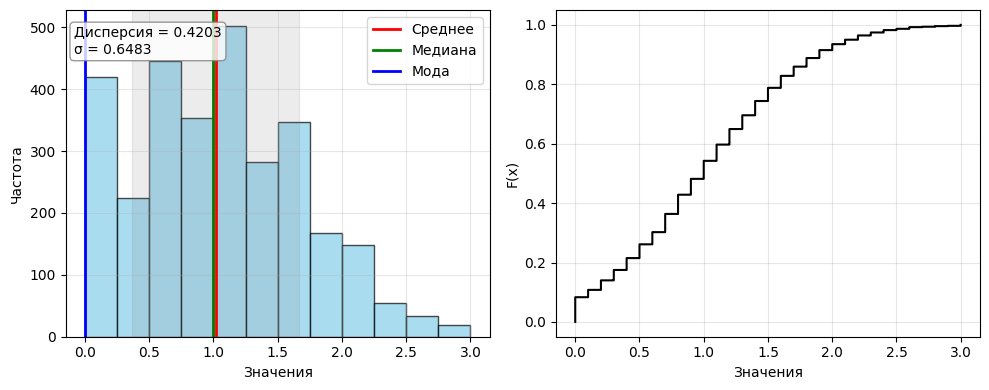

Хи-квадрат
χ² статистика: 446.23249682312223
Критическое значение (α=0.05): 16.918977604620448
Гипотеза о нормальности:  отвергается

Асимметрия и эксцесс
Асимметрия = 0.3400, SE = 0.0447
Эксцесс    = -0.4000, SE = 0.0894
Гипотеза о нормальности: отвергается 

Q-Q Plot


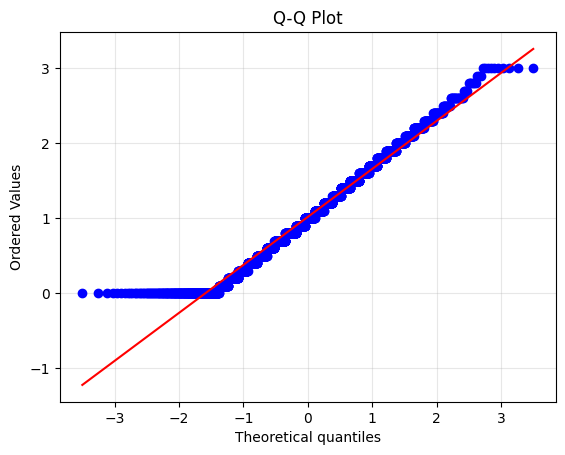

Стандартизация (Z-score)
Среднее: 5.743553780727476e-17
Дисперсия: 1.0003334444814935
Мода: -1.5678508937991074
Медиана: -0.025196685403790147
Квантили (0.25, 0.5, 0.75): (np.float64(-0.7965237896014488), np.float64(-0.025196685403790147), np.float64(0.7461304187938684))
Эксцесс: -0.3999728492906538
Асимметрия: 0.3400278969043469
Интерквартильный размах: 1.5426542083953172


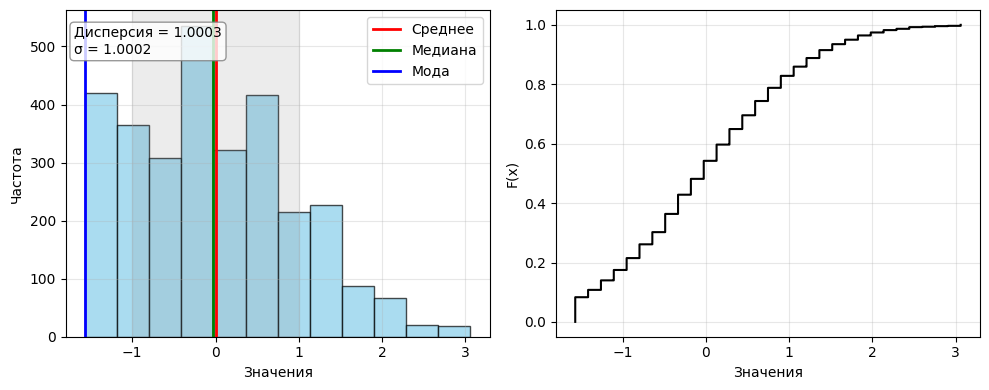

Хи-квадрат
χ² статистика: 465.949061358639
Критическое значение (α=0.05): 16.918977604620448
Гипотеза о нормальности:  отвергается

Асимметрия и эксцесс
Асимметрия = 0.3400, SE = 0.0447
Эксцесс    = -0.4000, SE = 0.0894
Гипотеза о нормальности: отвергается 

Q-Q Plot


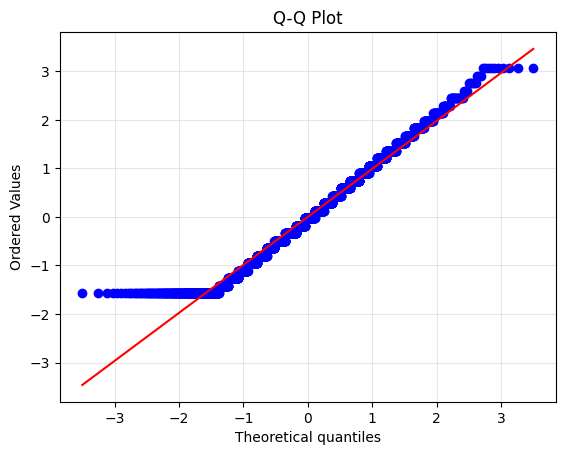

Модификация 3: Логарифмирование log(1+x) после усечения выбросов
Среднее: 0.6467893911259495
Дисперсия: 0.11366412926442897
Мода: 0.0
Медиана: 0.6931471805599453
Квантили (0.25, 0.5, 0.75): (np.float64(0.4054651081081644), np.float64(0.6931471805599453), np.float64(0.9162907318741551))
Эксцесс: -0.651648577672447
Асимметрия: -0.3188068678573809
Интерквартильный размах: 0.5108256237659907


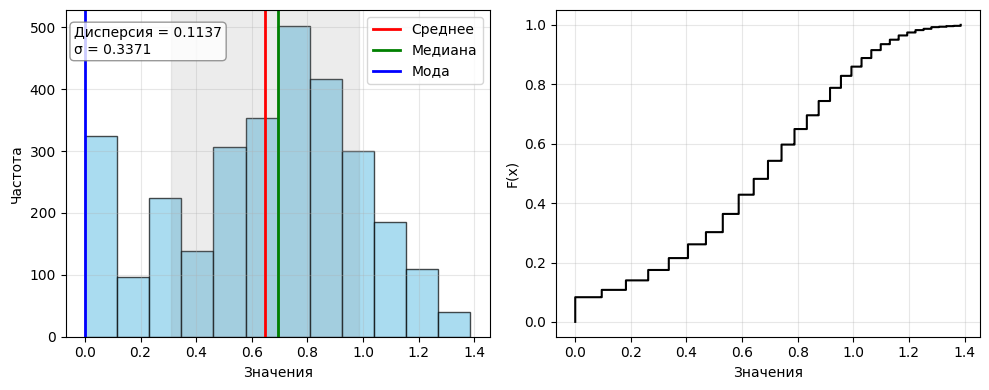

Хи-квадрат
χ² статистика: 821.8943313950089
Критическое значение (α=0.05): 16.918977604620448
Гипотеза о нормальности:  отвергается

Асимметрия и эксцесс
Асимметрия = -0.3188, SE = 0.0447
Эксцесс    = -0.6516, SE = 0.0894
Гипотеза о нормальности: отвергается 

Q-Q Plot


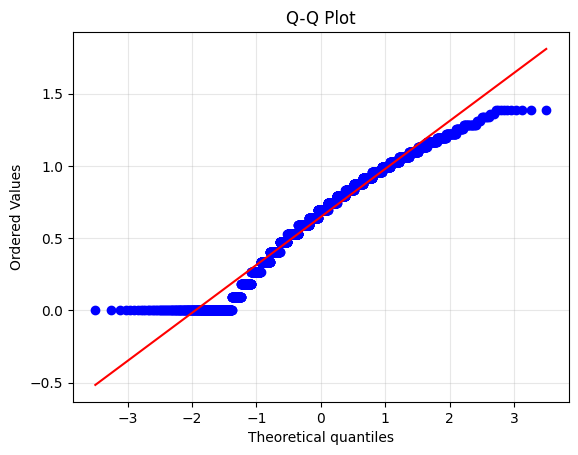


 Удаление всех нулевых значений
Среднее: 1.1087272727272728
Дисперсия: 0.3560969608783359
Мода: 0.8
Медиана: 1.0
Квантили (0.25, 0.5, 0.75): (np.float64(0.7), np.float64(1.0), np.float64(1.5))
Эксцесс: -0.24041976594456305
Асимметрия: 0.4568267436944265
Интерквартильный размах: 0.8


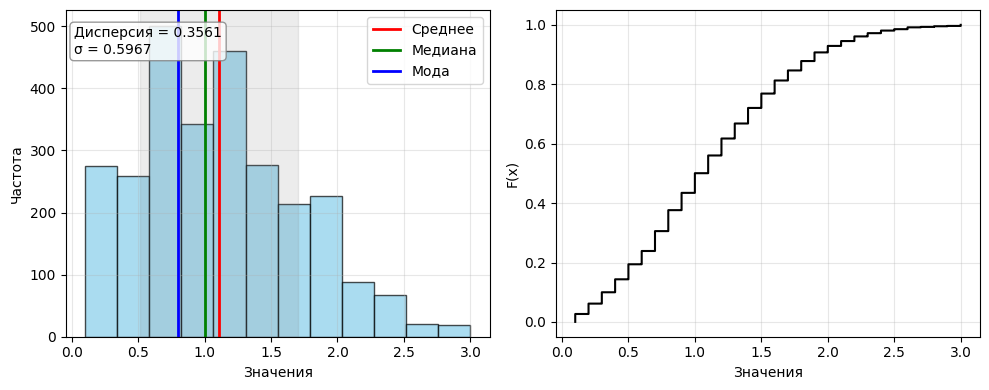

Хи-квадрат
χ² статистика: 292.7126897079438
Критическое значение (α=0.05): 16.918977604620448
Гипотеза о нормальности:  отвергается

Асимметрия и эксцесс
Асимметрия = 0.4568, SE = 0.0467
Эксцесс    = -0.2404, SE = 0.0934
Гипотеза о нормальности: отвергается 

Q-Q Plot


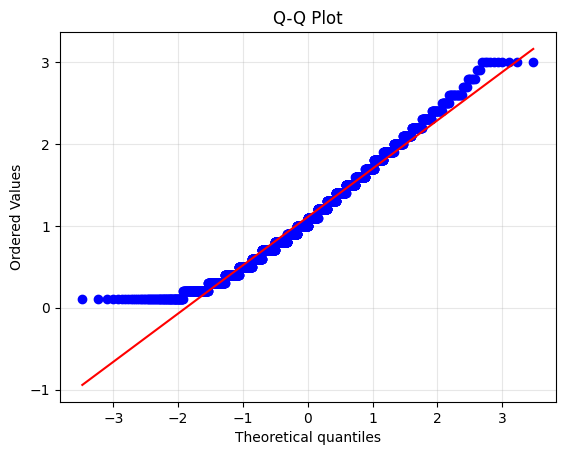

In [ ]:

# Усечение выбросов  1.5*IQR
q1, q3 = np.percentile(time_on_education, [25, 75])
iqr = q3 - q1
low, high = q1 - 1.5 * iqr, q3 + 1.5 * iqr
trimmed = time_on_education[(time_on_education >= low) & (time_on_education <= high)]


print("1: Усечение выбросов (1.5 * IQR)")

analyze_and_plot_with_stats(trimmed)
test_normality(trimmed)

# Стандартизация (Z-score)
standardized = stats.zscore(trimmed)

print("Стандартизация (Z-score)")

analyze_and_plot_with_stats(standardized)
test_normality(standardized)

# 3) Логарифмирование 
log_transformed = np.log1p(trimmed)  

print("Модификация 3: Логарифмирование ")

analyze_and_plot_with_stats(log_transformed)
test_normality(log_transformed)

# удаление всех нулевых значений
no_zeros = time_on_education[time_on_education > 0]

print("\n Удаление всех нулевых значений")
analyze_and_plot_with_stats(no_zeros)
test_normality(no_zeros)



выполнение данных преобразований над данными не привели исходные данные к нормальному распределению. 

=== Средние и дисперсии по классам ===
                  mean       var
School_Grade                    
10th          1.028542  0.448710
11th          0.991649  0.409888
12th          1.024008  0.400313
7th           1.021328  0.418375
8th           0.975311  0.423859
9th           1.052662  0.422764 



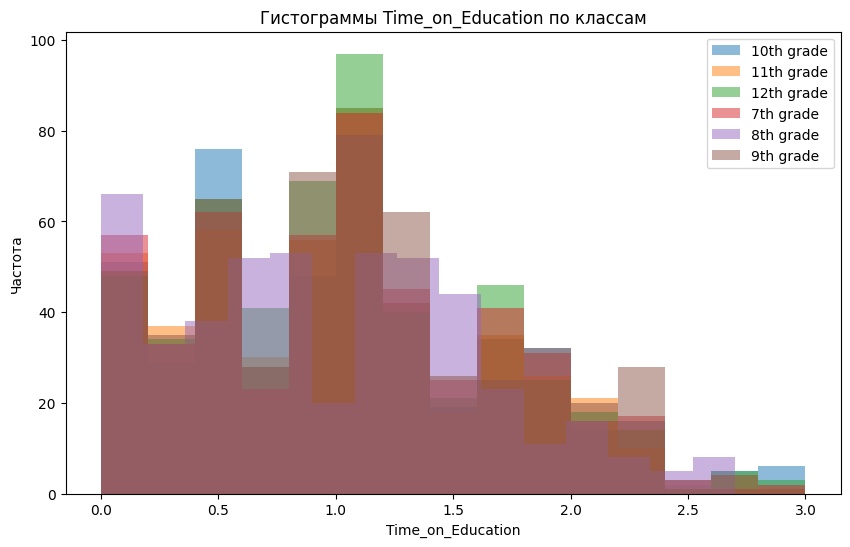

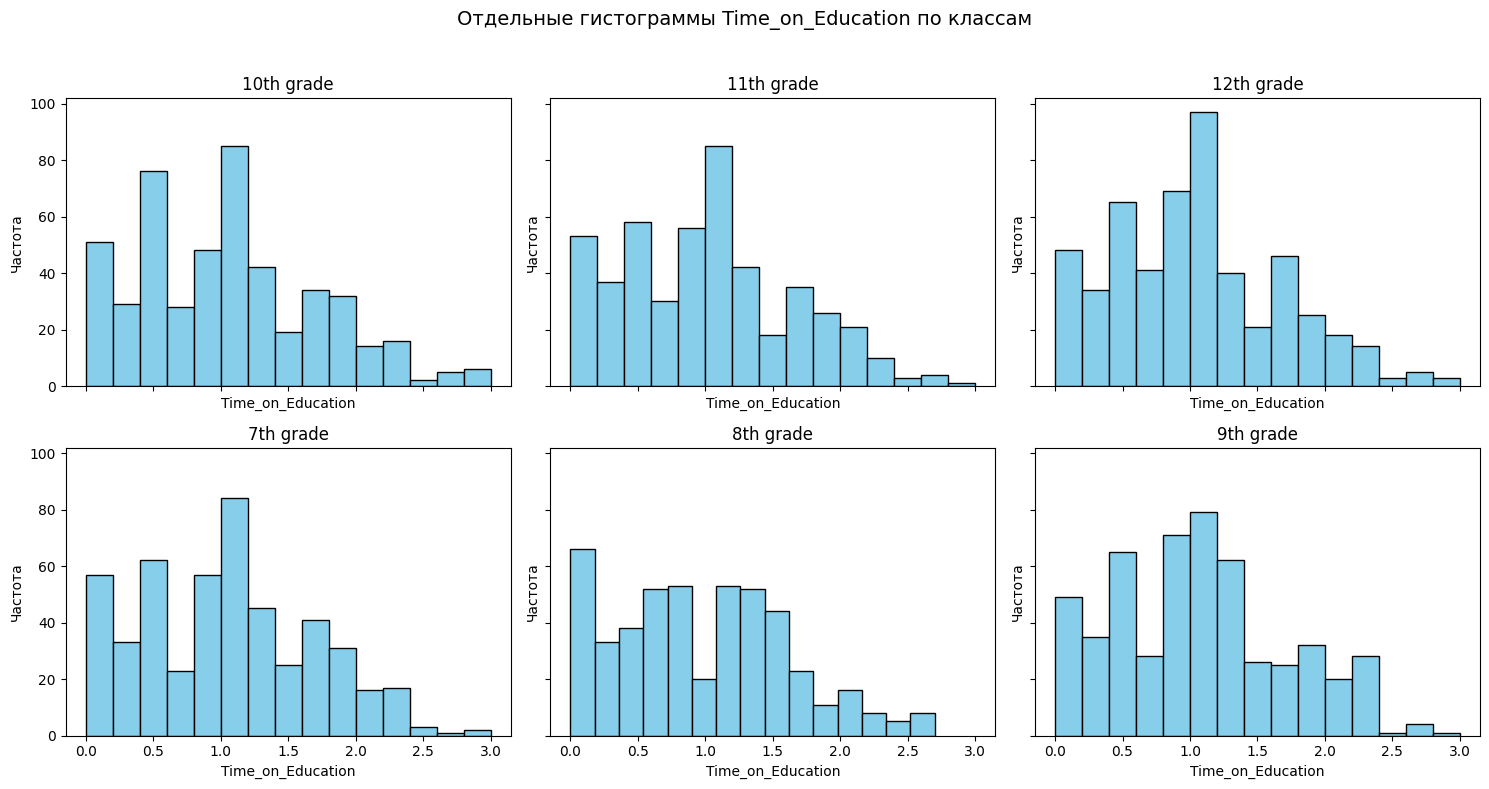

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../datasets/teen_phone_addiction_dataset.csv')

groups = df.groupby("School_Grade")["Time_on_Education"]


stats_by_grade = groups.agg(["mean", "var"])
print("=== Средние и дисперсии по классам ===")
print(stats_by_grade, "\n")


plt.figure(figsize=(10,6))
for grade, values in groups:
    plt.hist(values, bins=15, alpha=0.5, label=f"{grade} grade")

plt.title("Гистограммы Time_on_Education по классам")
plt.xlabel("Time_on_Education")
plt.ylabel("Частота")
plt.legend()
plt.show()


grades = sorted(df["School_Grade"].unique())
fig, axes = plt.subplots(2, 3, figsize=(15, 8), sharex=True, sharey=True)

for ax, grade in zip(axes.ravel(), grades):
    values = df[df["School_Grade"] == grade]["Time_on_Education"]
    ax.hist(values, bins=15, color="skyblue", edgecolor="black")
    ax.set_title(f"{grade} grade")
    ax.set_xlabel("Time_on_Education")
    ax.set_ylabel("Частота")

plt.suptitle("Отдельные гистограммы Time_on_Education по классам", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Все средние колеблются около 1.0 часа, различия между классами минимальные: от 0.975 (8th grade) до 1.052 (9th grade). Дисперсии для всех классов также очень близки: от 0.40 до 0.45. То есть степень вариативности внутри классов одинакова и ни один класс не выделяется более сжатым или разбросанным распределением. Больше всего выделяется 8 класс у которого явный пик в 0 и не так много значений в 1, у остальных гистограммы более менее имеют один пик в районе среднего значени, но при этом все же имеют правостороннюю ассиметрию.